# Классификация MNIST сверточной сетью

https://www.kaggle.com/c/digit-recognizer

In [2]:
import cv2
import numpy as np
import tensorflow as tf

print(tf.__version__)
print(tf.executing_eagerly())

2.9.1
True


In [3]:
train = np.loadtxt('https://raw.githubusercontent.com/a4tunado/lectures/master/002/data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('https://raw.githubusercontent.com/a4tunado/lectures/master/002/data/digit/test.csv', delimiter=',', skiprows=1)

In [7]:
train_img.shape

(42000, 28, 28, 1)

In [8]:
test_img.shape

(28000, 28, 28, 1)

In [4]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала, shirina i vqsota 28 na 28, 1 kanal, 
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

## Визуализируем исходные данные

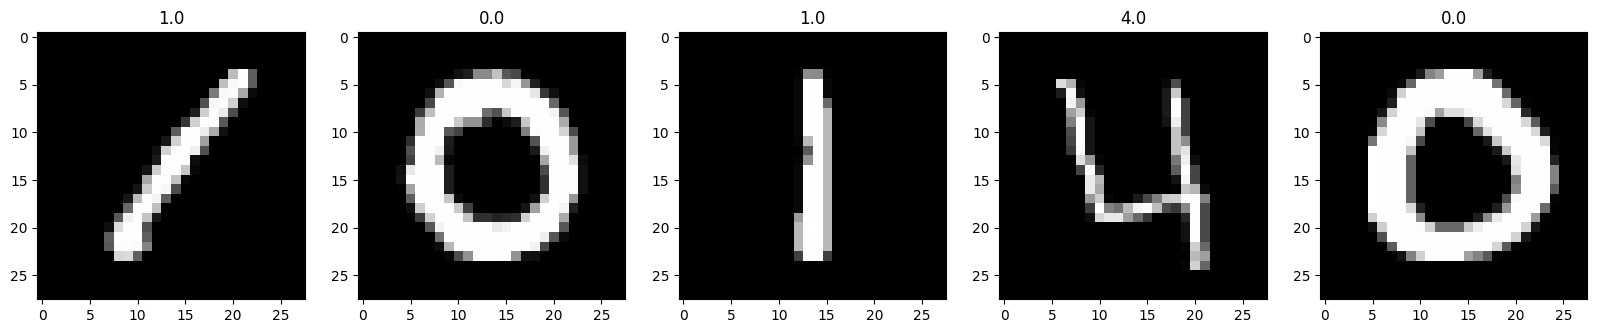

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5, :], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[:,:,0], cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Разбиваем выборку на обучение и валидацию

In [10]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)

## Собираем сверточную сеть для обучения

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu',
                           input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

## One-hot кодировка разметки

In [16]:
y_train_labels = tf.keras.utils.to_categorical(y_train)

In [17]:
print(y_train.shape)
print(y_train_labels.shape)

(33600,)
(33600, 10)


In [18]:
y_train[:3]

array([6., 5., 3.])

In [19]:
y_train_labels[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Запускаем обучение

In [20]:
model.fit(x_train, 
          y_train_labels,
          batch_size=32, 
          epochs=5,
          validation_split=0.2)

Epoch 1/5
840/840 [==============================] - 8s 10ms/step - loss: 1.3409 - accuracy: 0.7815 - val_loss: 0.2861 - val_accuracy: 0.9289
Epoch 2/5
840/840 [==============================] - 7s 9ms/step - loss: 0.1852 - accuracy: 0.9496 - val_loss: 0.1726 - val_accuracy: 0.9504
Epoch 3/5
840/840 [==============================] - 8s 9ms/step - loss: 0.1067 - accuracy: 0.9667 - val_loss: 0.1421 - val_accuracy: 0.9604
Epoch 4/5
840/840 [==============================] - 8s 10ms/step - loss: 0.0780 - accuracy: 0.9769 - val_loss: 0.1208 - val_accuracy: 0.9688
Epoch 5/5
840/840 [==============================] - 8s 9ms/step - loss: 0.0657 - accuracy: 0.9798 - val_loss: 0.1134 - val_accuracy: 0.9659


## Предсказываем класс объекта

In [21]:
y_pred = model.predict(x_val)
y_pred_labels = np.argmax(y_pred, axis=1)

263/263 [==============================] - 1s 5ms/step


## Оцениваем качество решение на валидационной выборке

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, y_pred_labels))

Accuracy: 0.9683333333333334


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_labels))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       816
         1.0       0.98      0.99      0.98       909
         2.0       0.98      0.97      0.97       846
         3.0       0.96      0.98      0.97       937
         4.0       0.94      0.98      0.96       839
         5.0       0.95      0.98      0.96       702
         6.0       0.98      0.98      0.98       785
         7.0       0.97      0.96      0.97       893
         8.0       0.99      0.91      0.95       835
         9.0       0.98      0.93      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



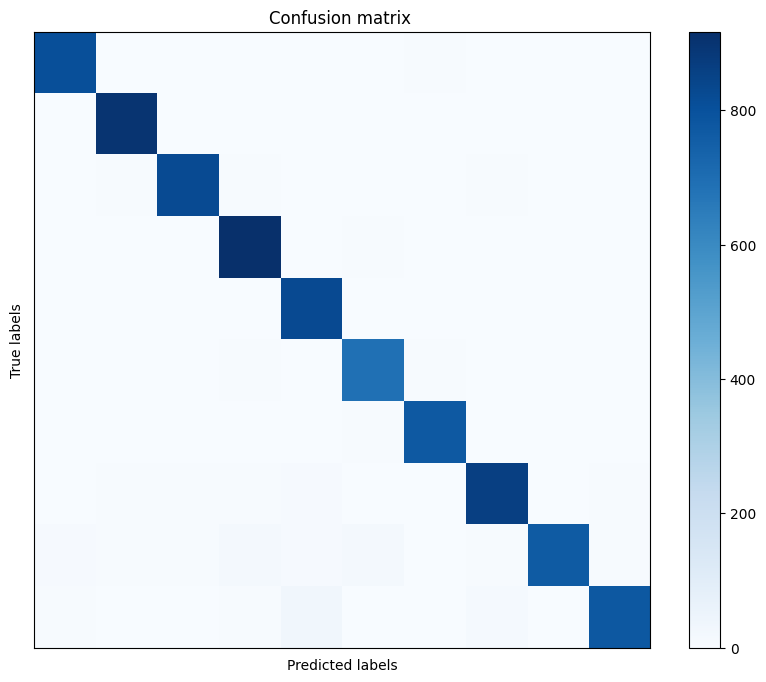

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_labels)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## Визуализируем предсказания для тестовой выборки

In [25]:
y_pred_test = model.predict(test_img)
y_pred_test_labels = np.argmax(y_pred_test, axis=1)

875/875 [==============================] - 5s 5ms/step


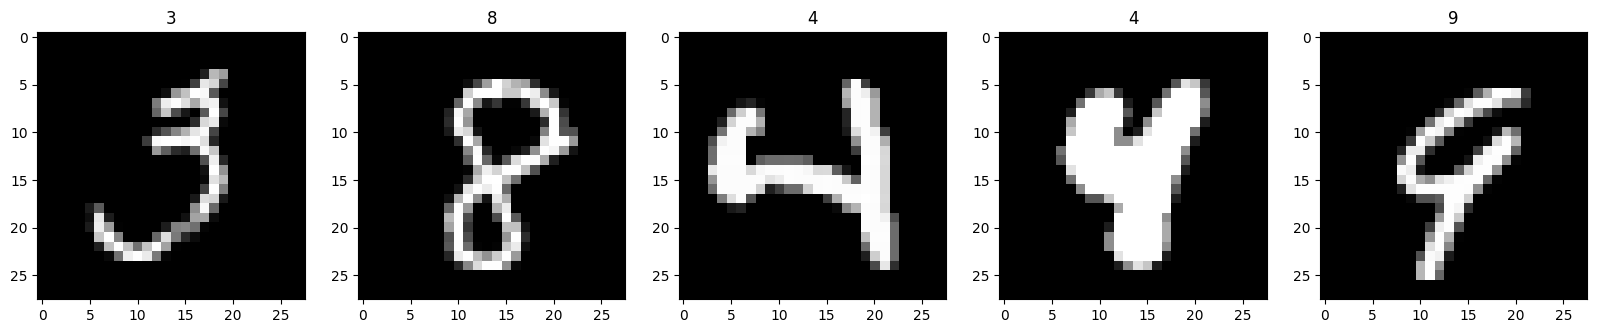

In [26]:
fig = plt.figure(figsize=(20, 10))
indices = np.random.choice(range(len(test_img)), 5)
img_prediction = zip(test_img[indices], y_pred_test_labels[indices])
for i, (img, pred) in enumerate(img_prediction, 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[...,0], cmap='gray');
    subplot.set_title('%d' % pred);

## Готовим файл для отправки

In [ ]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_pred_test_labels, 1):
        dst.write('%s,%d\n' % (i, p))

In [ ]:
# Your submission scored 0.96814